# Multivariate Linear Regression

### Data to be used

Independent variable : Combat score

Dependent variables: kills, damage, headshot %, loadout value

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import json

In [10]:
# Open the JSON file containing the data
file = open("data.json")

# Load the data from the JSON file
data = json.load(file)

# Access the 'matches' data from the loaded JSON
matches = data['data']

# Define the player's unique identifier (PUUID)
puuid = '6ffcd21d-1888-516a-b8ac-c49fd1a7220d'

# Initialize empty lists to store round stats and combat scores
round_stats = []
combat_scores = []

# Iterate through each match in the data
for match in matches:   
    # Check if the match is not a Deathmatch or Team Deathmatch mode
    if match["metadata"]["mode"] != "Deathmatch" and match["metadata"]["mode"] != "Team Deathmatch":
        # Access the rounds within the match
        rounds = match['rounds']

        # Iterate through each round within the match
        for round in rounds:
            # Access the player stats for each round
            round_player_stats = round['player_stats']

            # Iterate through each player's stats in the round
            for player in round_player_stats:
                # Check if the player's PUUID matches the desired PUUID
                if player['player_puuid'] == puuid:
                    # Extract relevant statistics for the player
                    kills = player['kills']
                    damage = player['damage']

                    # Calculate the headshot percentage
                    if player['headshots'] + player['bodyshots'] + player['legshots'] == 0:
                        headshot_percent = 0
                    else:
                        headshot_percent = player['headshots'] / (
                            player['headshots'] + player['bodyshots'] + player['legshots'])

                    loadout_value = player['economy']['loadout_value']

                    # Store the player's statistics for the round
                    player_values = [kills, damage,
                                     headshot_percent, loadout_value]
                    round_stats.append(player_values)

                    # Store the player's combat score
                    combat_scores.append(player['score'])

In [11]:
#Assigning the dependent variables (X) and independent variable (y)
X = round_stats
y = combat_scores

#Viewing the data
dataframe = pd.DataFrame(X,y,["Kills", "Damage", "Headshot %", "Loadout Value"])
dataframe

,Kills,Damage,Headshot %,Loadout Value
30,0,30,0.000000,700
303,1,202,0.142857,2700
26,0,26,0.000000,2700
0,0,0,0.000000,2500
40,0,40,0.000000,3650
...,...,...,...,...
348,1,208,0.000000,4000
0,0,0,0.000000,4600
113,0,113,0.000000,3000
0,0,0,0.000000,4600


## Single variable linear regression

In [29]:
# Enter Variable to be used
# "Kills", "Damage", "Headshot %", "Loadout Value"

variable_number = 1

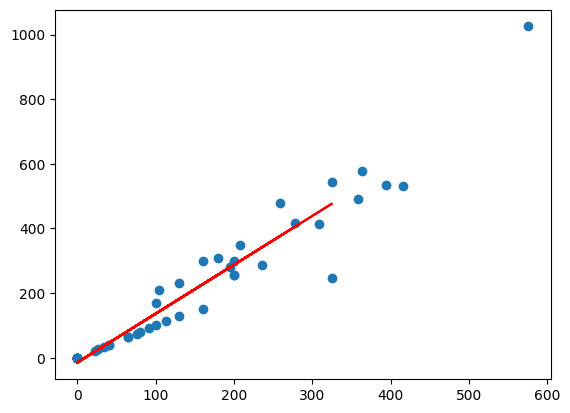

In [30]:
#Plotting Single Variable Regression
X_reshaped = np.array([item[variable_number] for item in X]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.4, random_state=45)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

#Training and Predicting
y_pred = pipe.fit(X_train, y_train).predict(X_test)

#Plotting
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')

plt.show()

## Multivariate Linear Regression

In [31]:
# Enter Variable to be displayed
variables = ("Kills", "Damage", "Headshot %", "Loadout Value")

variable_number = 3

In [32]:
#Creating the model
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])


#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 45)

#Training
pipe.fit(X_train, y_train)

#Predicting
y_pred = pipe.predict(X_test)

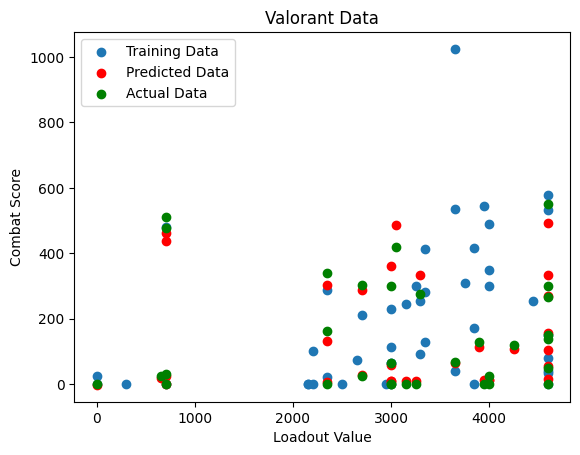

In [33]:
#Plotting the Multivariate regression

plt.scatter([item[variable_number]
            for item in X_train], y_train, label='Training Data')
plt.scatter([item[variable_number] for item in X_test],
            y_pred, color='red', label='Predicted Data')
plt.scatter([item[variable_number] for item in X_test],
            y_test, color='green', label='Actual Data')

plt.title("Valorant Data")
plt.xlabel(variables[variable_number])
plt.ylabel("Combat Score")
plt.legend()

plt.show()

## Metrics

 Mean Squared Error (MSE): This is the most commonly used metric for evaluating a Linear Regression model. It measures the average of the squared differences between the predicted values and the actual values. A lower MSE indicates better performance.

 Root Mean Squared Error (RMSE): This is the square root of the MSE and provides a more interpretable metric since it is in the same units as the target variable.

 Mean Absolute Error (MAE): This metric measures the average absolute differences between the predicted and actual values. It is less sensitive to outliers than the MSE.


In [34]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)

#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 20.47798672151933
MSE: 798.3561112967918
RMSE: 28.25519618223862
